In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import avt
import shap
import matplotlib.pyplot as plt

# Set the default font family to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [ ]:
df_new = pd.read_csv("Shap_new.csv")

In [3]:
df_new.drop(columns=("Unnamed: 0"),inplace=True)

In [4]:
df_new.rename(columns={"event":"point"},inplace=True)
df_new["point"]  = df_new["point"].astype(int)

In [5]:
palette = sns.color_palette(palette="Set1")

# Extract the positive and negative colors from the palette
positive_color = palette[0]
negative_color = palette[1]

In [6]:
from matplotlib import transforms

def risk_feature_plot(shap_values_point_df, order, bar_labels, ax=None):

    if ax is None:
        _, ax = plt.subplots(figsize=(1*width,0.5*width))

    ax = avt.waterfallplot(
        data=shap_values_point_df,
        y="Feature",
        x="Agitation Risk",
        order=order,
        base=shap_values_point_df['base_value'].iloc[0],
        orient='h',
        cmap = None,
        estimator='sum',
        positive_colour = positive_color,
        negative_colour = negative_color,
        width = 0.8,
        bar_label=True,
        ax=ax,
        arrow_kwargs={},
        bar_kwargs={},
        bar_label_kwargs={
            'fmt': '%.0f %%', 
            'labels': [''] + [f'+{x:.1f}' if x>=0 else f'{x:.1f}' for x in bar_labels]
        },
    )
    ax.tick_params(axis='y', which='major', labelsize=14) 

    base_value = shap_values_point_df["base_value"].iloc[0]
    proba_value = shap_values_point_df['Agitation Risk'].sum() + base_value
    proba_value_show = proba_value*100
    ax.axvline(proba_value, color='black', linestyle='--', linewidth=2, zorder=0)

    text_trans = transforms.blended_transform_factory(
        ax.transData, ax.transAxes)

    ax.text(
        proba_value*0.99, 
        0.0, 
        f'Final Risk: {proba_value_show:.0f}%', 
        ha='right', 
        va='bottom', 
        fontsize=14,
        transform=text_trans,
        bbox=dict(facecolor='white', edgecolor='black',)
    )

    ax.set_ylabel('')
    ax.set_xlabel('Agitation Risk (%)', fontsize=14)

    return ax

In [7]:
plot_feature_names = {
    "uvindex": "UV index",
    "sunset_minutes": "Sunset time",
    "temperature_ratio": "Temperature ratio",
    "ratio": "Illuminance ratio",
    "illuminance": "Outdoor illuminance",
    "cloudcover": "Cloudcover",
    "visibility": "Visibility",
    "number_transitions": "Number of transitions",
    'Lounge_night_illuminance': 'Lounge night illuminance',
    'Kitchen_night_illuminance': 'Kitchen night illuminance',
    'Kitchen_afternoon_illuminance': 'Kitchen afternoon illuminance',
    'Kitchen_morning_illuminance': 'Kitchen morning illuminance',
    'Bathroom_evening_illuminance': 'Bathroom evening illuminance',
    'Bathroom_evening_temperature': 'Bathroom evening temperature',
    'Kitchen_night_temperature': 'Kitchen night temperature',
    'Kitchen_morning_temperature': 'Kitchen morning temperature',
    "Lounge_afternoon_activity" :'Lounge afternoon activity',
    'awake_ratio' : 'Awake ratio',
    'rr_min' : 'Minimum respiratory rate',
    'rr_min_std' : 'Variability of minimum respiratory rate',
    'rr_average' :'Average respiratory rate'}

In [8]:
df_new["Feature"]= df_new["Feature"].replace(plot_feature_names)

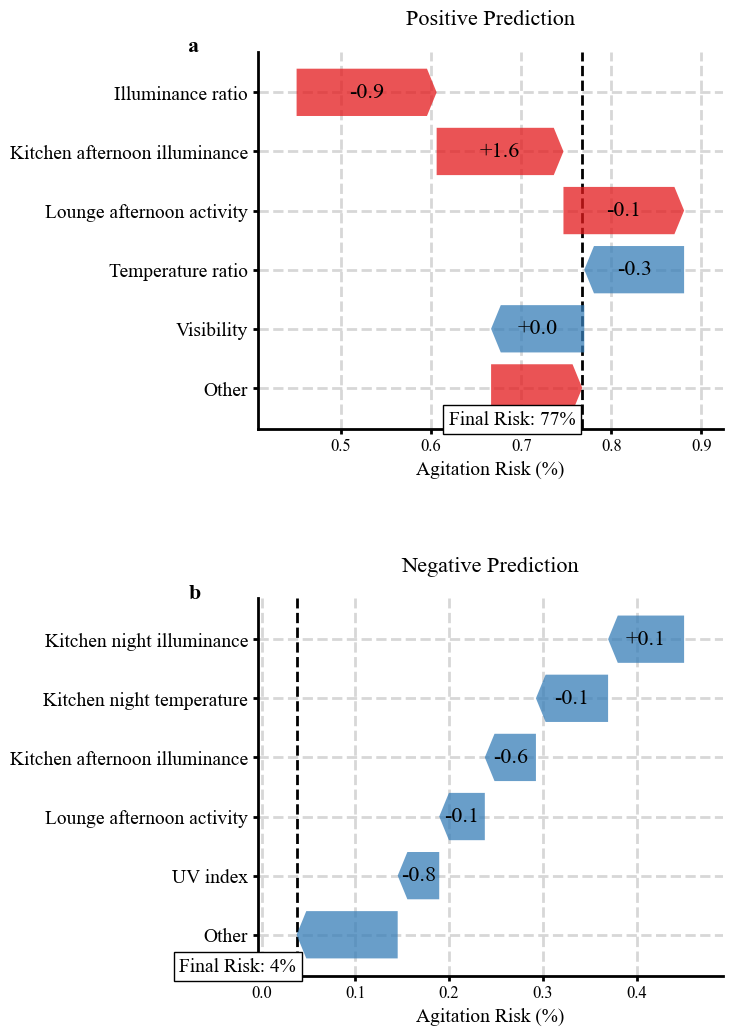

In [9]:
import matplotlib.pyplot as plt
import avt  # Assuming you have a custom paper theme defined in avt

# Create the figure and subplots
with avt.paper_theme():
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 12))

    # Plot the first set of data
    shap_values_point_df_1 = (
        df_new[df_new["point"] == 516.0]
        .rename(columns={'Shap': 'Agitation Risk'})
    )
    order_1 = (
        shap_values_point_df_1
        .groupby("Feature")
        .sum()
        .reset_index()
        .set_index("Feature")
        .sort_values("Agitation Risk", key=abs, ascending=False)
        .index[:5]
    )
    bar_labels_1 = (
        shap_values_point_df_1.set_index('Feature').loc[order_1]['Value'].values[::-1]
    )
    risk_feature_plot(shap_values_point_df_1, order_1, bar_labels_1, ax=ax1)
    ax1.grid(True, axis="y")

    # Plot the second set of data
    shap_values_point_df_2 = (
        df_new[df_new["point"] == 518.0]
        .rename(columns={'Shap': 'Agitation Risk'})
    )
    order_2 = (
        shap_values_point_df_2
        .groupby("Feature")
        .sum()
        .reset_index()
        .set_index("Feature")
        .sort_values("Agitation Risk", key=abs, ascending=False)
        .index[:5]
    )
    bar_labels_2 = (
        shap_values_point_df_2.set_index('Feature').loc[order_2]['Value'].values[::-1]
    )
    risk_feature_plot(shap_values_point_df_2, order_2, bar_labels_2, ax=ax2)
    ax2.grid(True, axis="y")

    for i, ax in enumerate([ax1, ax2]):
        if i == 0:
            ax.text(-0.15, 1.00, 'a', transform=ax.transAxes, fontsize=16, fontweight='bold')
        elif i == 1:
            ax.text(-0.15, 1.00, 'b', transform=ax.transAxes, fontsize=16, fontweight='bold')

    ax1.set_title("Positive Prediction", y=1.05, fontsize=16)
    ax2.set_title("Negative Prediction", y=1.05, fontsize=16)


plt.subplots_adjust(hspace=0.45)
plt.savefig("SHAPplots_examples.pdf",bbox_inches='tight')


In [10]:
shap_values_point_df_1 = (
            df_new[df_new["point"] == 516]
            .rename(columns={'Shap': 'Agitation Risk'})
        )
order_1 = (
            shap_values_point_df_1
            .groupby("Feature")
            .sum()
            .reset_index()
            .set_index("Feature")
            .sort_values("Agitation Risk", key=abs, ascending=False)
            .index[:5]
        )
bar_labels_1 = (
            shap_values_point_df_1.set_index('Feature').loc[order_1]['Value'].values[::-1]
        )
    

shap_values_point_df_2 = (
            df_new[df_new["point"] == 518]
            .rename(columns={'Shap': 'Agitation Risk'})
        )
order_2 = (
            shap_values_point_df_2
            .groupby("Feature")
            .sum()
            .reset_index()
            .set_index("Feature")
            .sort_values("Agitation Risk", key=abs, ascending=False)
            .index[:5]
        )
bar_labels_2 = (
            shap_values_point_df_2.set_index('Feature').loc[order_2]['Value'].values[::-1]  
        )


In [11]:
from matplotlib import transforms
import avt

def risk_feature_plot(shap_values_point_df, order, bar_labels, ax):
    with avt.paper_theme():
        ax = avt.waterfallplot(
            data=shap_values_point_df,
            y="Feature",
            x="Agitation Risk",
            order=order,
            base=shap_values_point_df['base_value'].iloc[0],
            orient='h',
            cmap=None,
            estimator='sum',
            positive_colour=positive_color,
            negative_colour=negative_color,
            width=0.8,
            bar_label=True,
            arrow_kwargs={},
            bar_kwargs={},
            bar_label_kwargs={
                'fmt': '%.0f %%', 
                'labels': [''] + [f'+{x:.1f}' if x >= 0 else f'{x:.1f}' for x in bar_labels]
            },
            ax=ax
        )

        ax.tick_params(axis='y', which='major', labelsize=14) 

        base_value = shap_values_point_df["base_value"].iloc[0]
        proba_value = shap_values_point_df['Agitation Risk'].sum() + base_value
        proba_value_show = proba_value*100
        ax.axvline(proba_value, color='black', linestyle='--', linewidth=2, zorder=0)

        text_trans = transforms.blended_transform_factory(
            ax.transData, ax.transAxes)

        ax.text(
            proba_value*0.99, 
            0.0, 
            f'Final Risk: {proba_value_show:.0f}%', 
            ha='right', 
            va='bottom', 
            fontsize=14,
            transform=text_trans,
            bbox=dict(facecolor='white', edgecolor='black',)
        )

        ax.set_ylabel('')
        ax.set_xlabel('Agitation Risk (%)', fontsize=14)

        return ax


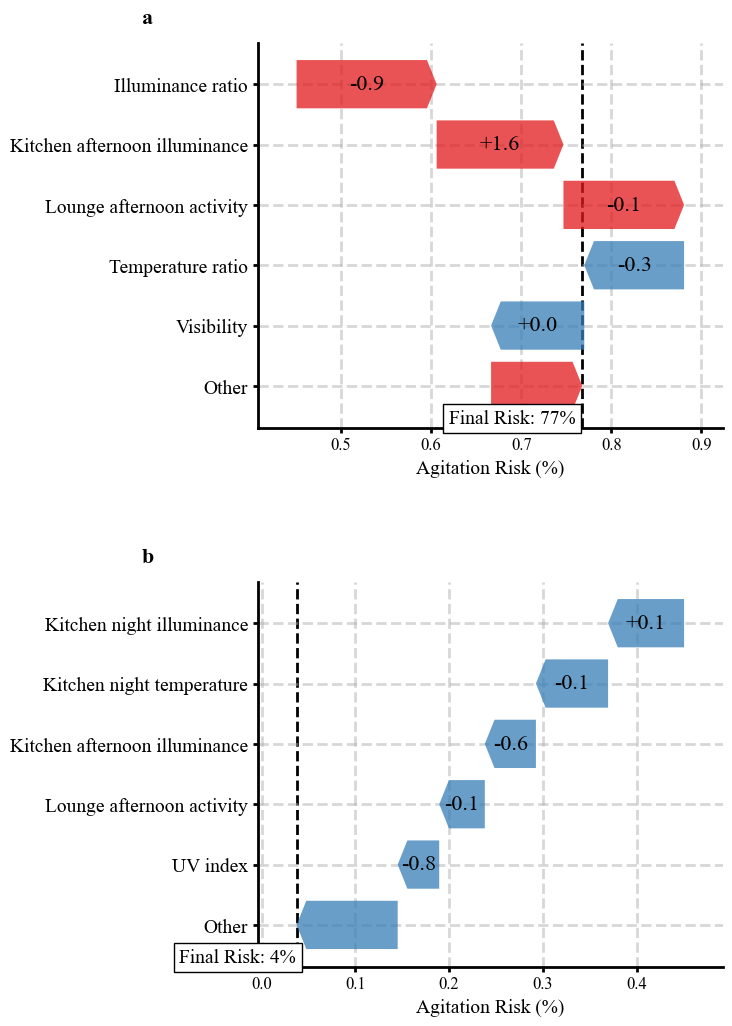

In [12]:
with avt.paper_theme():
    fig, axes = plt.subplots(2, 1, figsize=(6, 12))  
    risk_feature_plot(shap_values_point_df_1, order_1, bar_labels_1, ax=axes[0])
    risk_feature_plot(shap_values_point_df_2, order_2, bar_labels_2, ax=axes[1])
    
    axes[0].text(-0.25, 1.05, 'a', transform=axes[0].transAxes, fontsize=16, fontweight='bold')
    axes[1].text(-0.25, 1.05, 'b', transform=axes[1].transAxes, fontsize=16, fontweight='bold')
    axes[0].grid(True, axis="y")
    axes[1].grid(True, axis="y")
    plt.subplots_adjust(hspace=0.4)
    plt.savefig("SHAPplots_examples.pdf",bbox_inches="tight")

In [13]:
shap_values_point_df_3 = (
            df_new[df_new["point"] == 297]
            .rename(columns={'Shap': 'Agitation Risk'})
        )
order_3 = (
            shap_values_point_df_3
            .groupby("Feature")
            .sum()
            .reset_index()
            .set_index("Feature")
            .sort_values("Agitation Risk", key=abs, ascending=False)
            .index[:5]
        )
bar_labels_3= (
            shap_values_point_df_3.set_index('Feature').loc[order_3]['Value'].values[::-1]
        )
    

shap_values_point_df_4 = (
            df_new[df_new["point"] == 290]
            .rename(columns={'Shap': 'Agitation Risk'})
        )
order_4= (
            shap_values_point_df_4
            .groupby("Feature")
            .sum()
            .reset_index()
            .set_index("Feature")
            .sort_values("Agitation Risk", key=abs, ascending=False)
            .index[:5]
        )
bar_labels_4 = (
            shap_values_point_df_4.set_index('Feature').loc[order_4]['Value'].values[::-1]  
        )


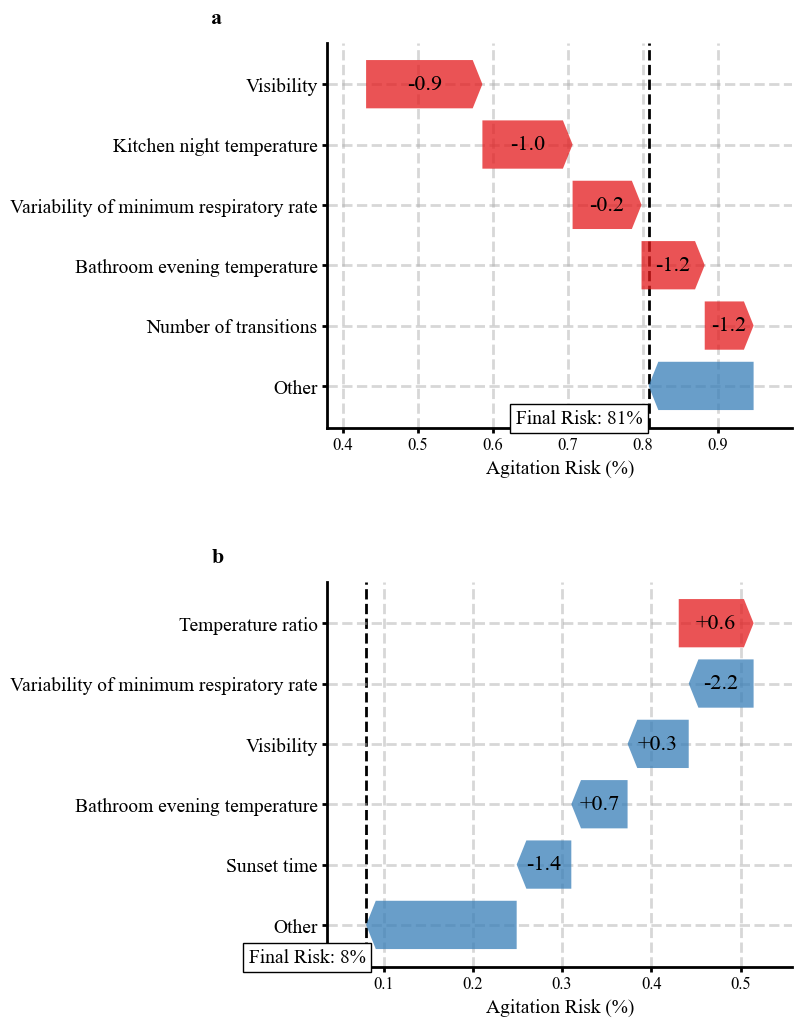

In [14]:
with avt.paper_theme():
    fig, axes = plt.subplots(2, 1, figsize=(6, 12))  
    risk_feature_plot(shap_values_point_df_3, order_3, bar_labels_3, ax=axes[0])
    risk_feature_plot(shap_values_point_df_4, order_4, bar_labels_4, ax=axes[1])
    
    axes[0].text(-0.25, 1.05, 'a', transform=axes[0].transAxes, fontsize=16, fontweight='bold')
    axes[1].text(-0.25, 1.05, 'b', transform=axes[1].transAxes, fontsize=16, fontweight='bold')
    axes[0].grid(True, axis="y")
    axes[1].grid(True, axis="y")
    plt.subplots_adjust(hspace=0.4)
    plt.savefig("SHAPplots_examplestemp.pdf",bbox_inches="tight")

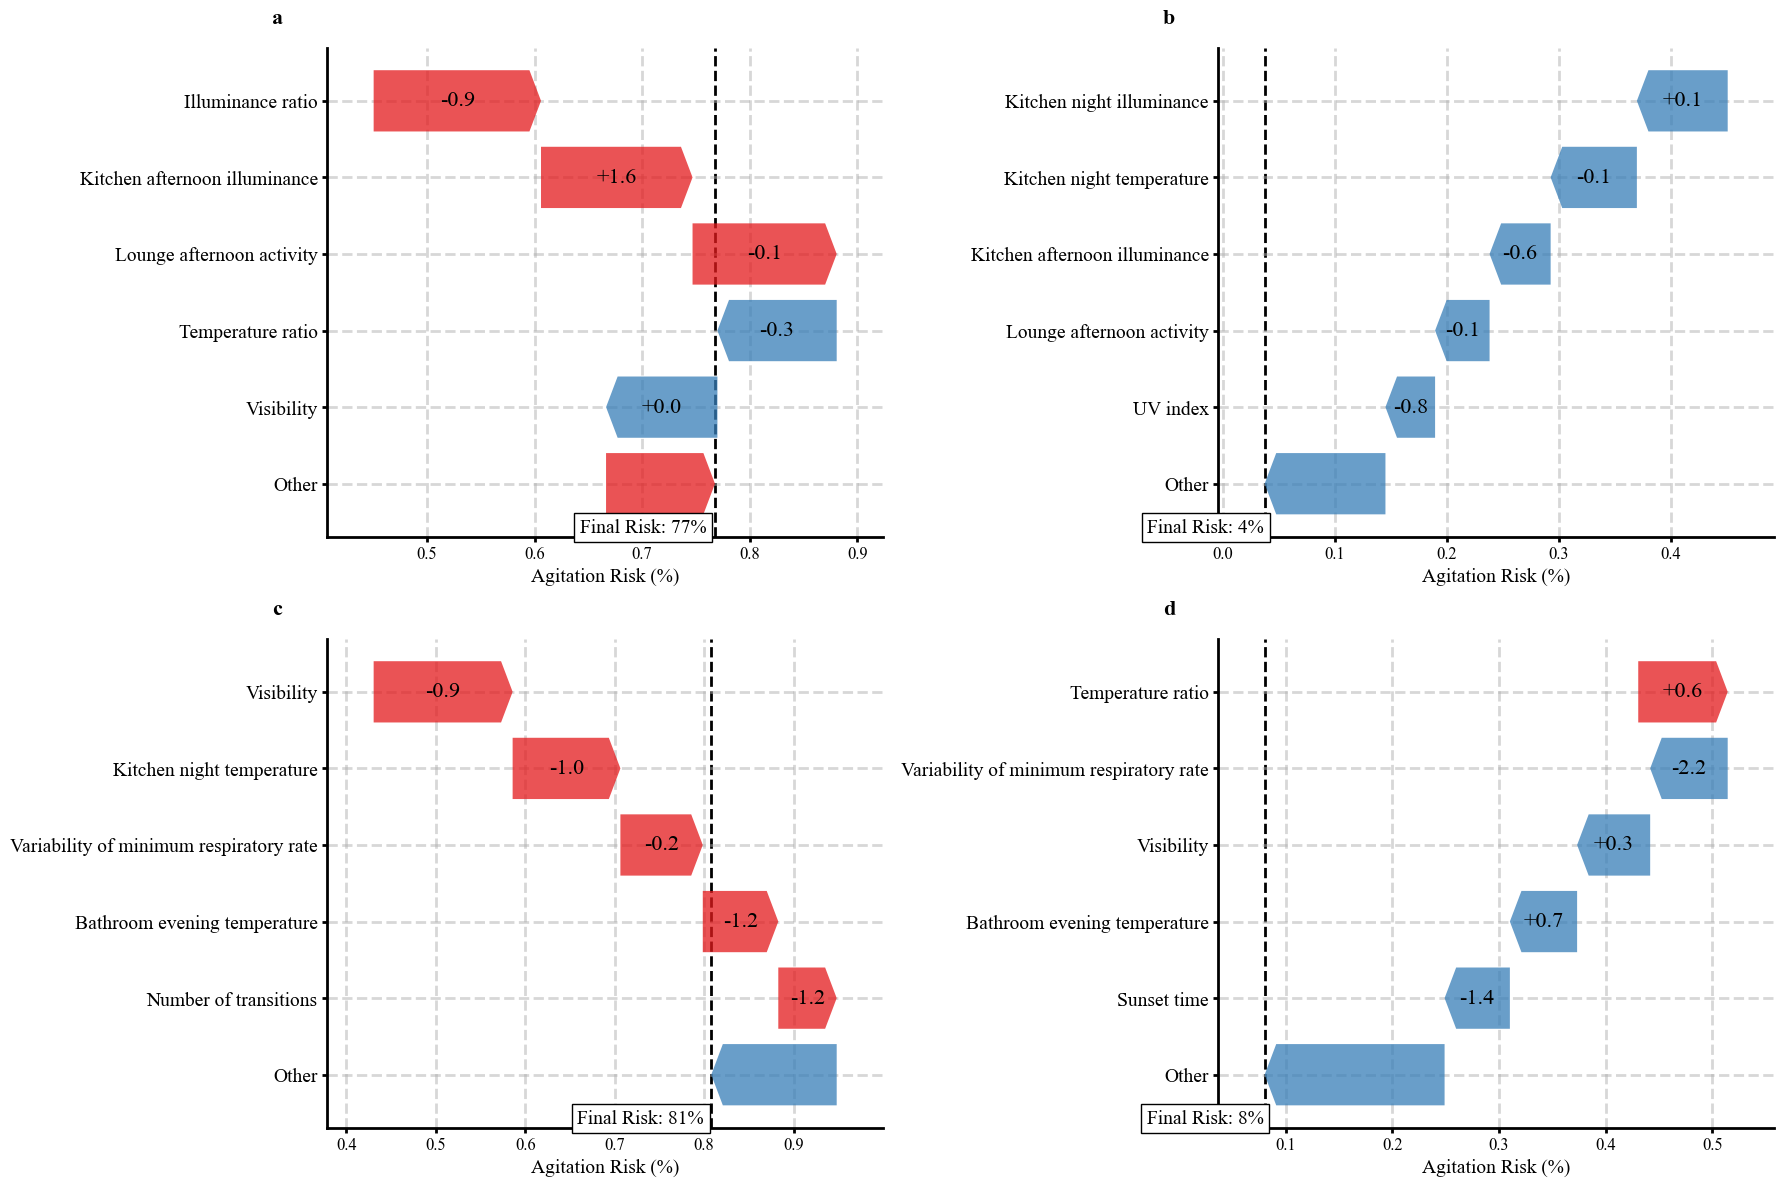

In [15]:
import matplotlib.pyplot as plt

# Assuming avt.paper_theme() sets the theme for the plots
with avt.paper_theme():
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    # Create each subplot
    risk_feature_plot(shap_values_point_df_1, order_1, bar_labels_1, ax=axes[0, 0])
    risk_feature_plot(shap_values_point_df_2, order_2, bar_labels_2, ax=axes[0, 1])
    risk_feature_plot(shap_values_point_df_3, order_3, bar_labels_3, ax=axes[1, 0])
    risk_feature_plot(shap_values_point_df_4, order_4, bar_labels_4, ax=axes[1, 1])
    
    # Label each subplot with a, b, c, d
    axes[0, 0].text(-0.1, 1.05, 'a', transform=axes[0, 0].transAxes, fontsize=16, fontweight='bold')
    axes[0, 1].text(-0.1, 1.05, 'b', transform=axes[0, 1].transAxes, fontsize=16, fontweight='bold')
    axes[1, 0].text(-0.1, 1.05, 'c', transform=axes[1, 0].transAxes, fontsize=16, fontweight='bold')
    axes[1, 1].text(-0.1, 1.05, 'd', transform=axes[1, 1].transAxes, fontsize=16, fontweight='bold')
    
    # Add grid to each subplot
    axes[0, 0].grid(True, axis="y")
    axes[0, 1].grid(True, axis="y")
    axes[1, 0].grid(True, axis="y")
    axes[1, 1].grid(True, axis="y")
    
    # Adjust the spacing between subplots
    plt.tight_layout()
    # Save the figure
    plt.savefig("SHAPplots_examplesboth.pdf", bbox_inches="tight")


In [16]:
# Top features used in the model

top_features = ['Kitchen_night_temperature', 'ratio', 'sunset_minutes', 'visibility','illuminance','uvindex','Lounge_night_illuminance',
'Kitchen_night_illuminance','Bathroom_evening_temperature','rr_average','number_transitions','awake_ratio','To_bed','rr_min', 'Bathroom_night_activity',
'temperature_ratio','Kitchen_afternoon_illuminance','Kitchen_morning_temperature','Lounge_afternoon_activity','rr_min_std']


In [17]:
top_features_dotplot = [plot_feature_names.get(feature, feature) for feature in top_features]

In [18]:
top_features_dotplot

['Kitchen night temperature',
 'Illuminance ratio',
 'Sunset time',
 'Visibility',
 'Outdoor illuminance',
 'UV index',
 'Lounge night illuminance',
 'Kitchen night illuminance',
 'Bathroom evening temperature',
 'Average respiratory rate',
 'Number of transitions',
 'Awake ratio',
 'To_bed',
 'Minimum respiratory rate',
 'Bathroom_night_activity',
 'Temperature ratio',
 'Kitchen afternoon illuminance',
 'Kitchen morning temperature',
 'Lounge afternoon activity',
 'Variability of minimum respiratory rate']

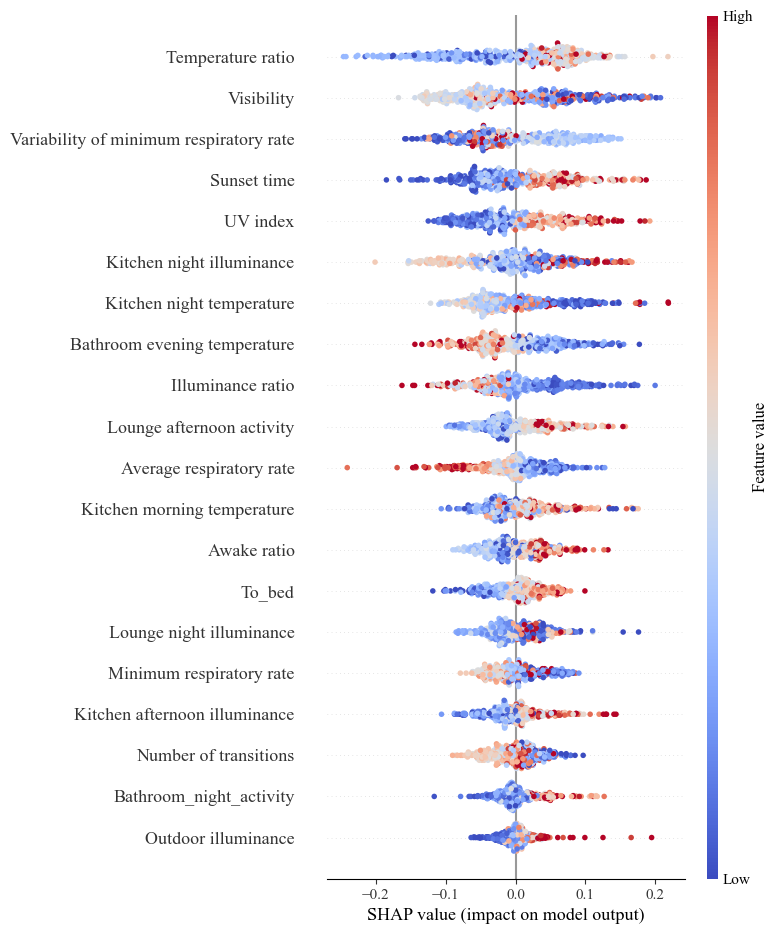

In [19]:
features_list = np.load("/Users/meb22/Downloads/Features2.txt.npy")
shap_list = np.load("/Users/meb22/Downloads/Shap2.txt.npy")

shap.summary_plot(shap_list, features_list, feature_names=top_features_dotplot, plot_type='dot', cmap="coolwarm", show=False)
# Save the plot as a PDF file
plt.savefig('SHAP_dotplot.pdf', bbox_inches='tight')